In [1]:
import pandas as pd
import nltk
import seaborn as sns
import re

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/lambda/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lambda/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# El dataset contiene opiniones posteadas por consumidores sobre productos vendidos en Amazon.
# Nos interesan el texto de la opinión, su título y con cuántas estrellas puntuó el producto.
# Queremos predecir la cantidad de estrellas en base a lo que el usuario escribió

train = pd.read_json('dataset_es_train.json', lines=True)
test = pd.read_json('dataset_es_test.json', lines=True)

In [3]:
train.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes


In [4]:
print(train.shape)
print(test.shape)

# Vamos a juntar train y test para regularizarlos al mismo tiempo, y luego los volveremos a separar

df = pd.concat([train, test], ignore_index=True)
print(df.shape)
print(df.iloc[4996][4])

(200000, 8)
(5000, 8)
(205000, 8)
La calidad es pésima, si fueran un poco peores estarían hechos de papel. Muy chungos, de verdad. No merecen la pena.


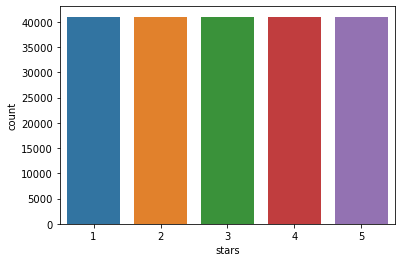

In [5]:
# El dataset está balanceado por cantidad de estrellas
sns.countplot(df['stars'])

In [6]:
# Nos quedamos con las columnas de interés
df.drop(labels=['review_id', 'product_id', 'reviewer_id', 'language', 'product_category'], axis =1, inplace=True)

In [7]:
# Regularización

# Pasamos a minúsculas
df['review_body'] = df['review_body'].str.lower()
df['review_title'] = df['review_title'].str.lower()


# Nos deshacemos de los caracteres especiales
# Nuestro regex selecciona letras con tilde y espacios

df['review_body'].replace('[^A-Za-záéíóúÁÉÍÓÚ ]',' ', regex=True, inplace=True)
df['review_title'].replace('[^A-Za-záéíóúÁÉÍÓÚ ]',' ', regex=True)


display(df)

,stars,review_body,review_title
0,1,nada bueno se me fue ka pantalla en menos de ...,television nevir
1,1,horrible nos tuvimos que comprar otro porque ...,dinero tirado a la basura con esta compra
2,1,te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...
3,1,no entro en descalificar al vendedor solo pue...,producto no recibido.
4,1,llega tarde y co la talla equivocada,devuelto
...,...,...,...
204995,5,para lo que cuesta es perfecto porque cumple s...,perfectos para lo que sirven
204996,5,material muy flexible y cómodo acorde a la de...,"buen vendedor, rápido y fiable."
204997,5,se ve bien el grabado,medallas con bonito grabado
204998,5,lo compré para mi bici pero finalmente se lo h...,timbre


In [ ]:
# Si queremos usar el pos_tag de nltk se nos va a complicar porque no es tan sencillo cuando el idioma no es inglés
# Mejor usar spacy https://spacy.io/models/es
import spacy
nlp = spacy.load('es_core_news_sm')

# Tokenizar

tokens = []
lemma = []
pos = []

for doc in nlp.pipe(df['review_body'].astype('unicode').values, batch_size=205000, n_threads=3):
    if doc.is_parsed:
        tokens.append([n.text for n in doc])
        lemma.append([n.lemma_ for n in doc])
        pos.append([n.pos_ for n in doc])
    else:
        tokens.append(None)
        lemma.append(None)
        pos.append(None)

df['tokens'] = tokens
df['lemma'] = lemma
df['pos'] = pos

In [ ]:

# Creamos una nueva columna con las palabras tokenizadas
df['tokenized_sents'] = df.apply(lambda row: nltk.word_tokenize(row['review_body']), axis=1)

print(df)

In [ ]:
# Remover stop words
stopwords = nltk.corpus.stopwords.words('spanish')
stopwords.remove('no')
stopwords.remove('pero')

# se puede imprimir esta lista para ver qué hay adentro, es larga
stopwords.sort()
print(stopwords)

In [ ]:
df['tokenized_sents'] = df['tokenized_sents'].apply(lambda x: [word for word in x if word not in stopwords])

In [ ]:
# Vemos un ejemplo de cómo queda
df.iloc[4996]

In [ ]:
# Lematizar
nltk.download('omw')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet as wn
wn.synsets('bank')[0].lemma_names('spa')

In [ ]:
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

df = pd.DataFrame(['this was cheesy', 'she likes these books', 'wow this is great'], columns=['text'])
df['text_lemmatized'] = df.text.apply(lemmatize_text)

In [ ]:
# Bag of Words


In [ ]:
# Modelo